**Black Friday Sales Analysis – Project Overview**

Goal:
This project aims to examine Black Friday sales data to gain insights into customer purchasing behavior and market trends. By leveraging exploratory data analysis (EDA) and visualization techniques, we aim to understand spending patterns across various demographics and product categories.

Key Phases:
1. Data Acquisition & Understanding
2. Data Cleaning & Preprocessing
3. Exploratory Data Analysis (EDA)
4. Insights & Business Implications


In [100]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

**1. Data Acquisition (Load the dataset and examine its structure)**

In [101]:
df = pd.read_csv("BlackFriday.csv")

df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


**2. Data Exploration**

In [102]:
print("Dataset Dimensions:", df.shape)
print("\nDataset Information:")
df.info()
print("\nSummary Statistics:")
df.describe()

Dataset Dimensions: (537577, 12)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), in

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


**3. Data Cleaning**

In [103]:
df.isnull().sum()  # Before handling missing values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [104]:
#Impute Missing data using median of the column:
def impute_nan(df, variable, median):
    df[variable] = df[variable].fillna(median)
    
#Calculate median:
median = df.Product_Category_2.median()

#Call the function:
impute_nan(df, 'Product_Category_2', median)

In [105]:
#Same for the Product_Category_3 Column:
median = df.Product_Category_3.median()

#Call the function:
impute_nan(df, 'Product_Category_3', median)

#check for updation:
df.isnull().sum()  # After handling missing values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [106]:
print("Number of unique product IDs :", df['Product_ID'].nunique())
print("Number of unique genders :", df['Gender'].nunique())  # F and M
print("Number of unique age groups :", df['Age'].nunique()) # ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
print("Number of unique occupations :", df['Occupation'].nunique())# [10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,5, 14, 13,  6]
print("Number of unique city categories :", df['City_Category'].nunique()) #['A', 'C', 'B']
print("Number of unique values in Stay In Current City Years :", df['Stay_In_Current_City_Years'].nunique()) #['2', '4+', '3', '1', '0']
print("Number of unique marital statuses :", df['Marital_Status'].nunique()) #  [0, 1]  0 --> Unmarried and 1 --> Married
print("Number of unique values in Product Category 1 :", df['Product_Category_1'].nunique()) 
print("Number of unique values in Product Category 2 :", df['Product_Category_2'].nunique()) 
print("Number of unique values in Product Category 3 :", df['Product_Category_3'].nunique())



Number of unique product IDs : 3623
Number of unique genders : 2
Number of unique age groups : 7
Number of unique occupations : 21
Number of unique city categories : 3
Number of unique values in Stay In Current City Years : 5
Number of unique marital statuses : 2
Number of unique values in Product Category 1 : 18
Number of unique values in Product Category 2 : 17
Number of unique values in Product Category 3 : 15


In [107]:
df['Purchase'].sum()/len(df["Purchase"])   # calculates the average (mean) purchase amount.

9333.859852635065

**4. Exploratory Data Analysis (EDA)**

In [108]:
# This code creates a new DataFrame named data with a single column called "Ratio" that contains the count of records for each gender
data = pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data 

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

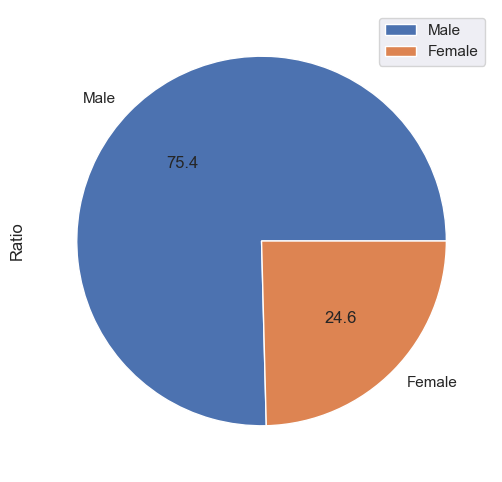

In [109]:
# The pie chart depicts the distribution of Male vs. Female in the dataset
data.plot.pie(y='Ratio',figsize=(6,6),autopct = "%.1f")

-- AVERAGE PURCHASE BASED ON GENDER COLUMN

<Axes: title={'center': 'Gender Ratio'}>

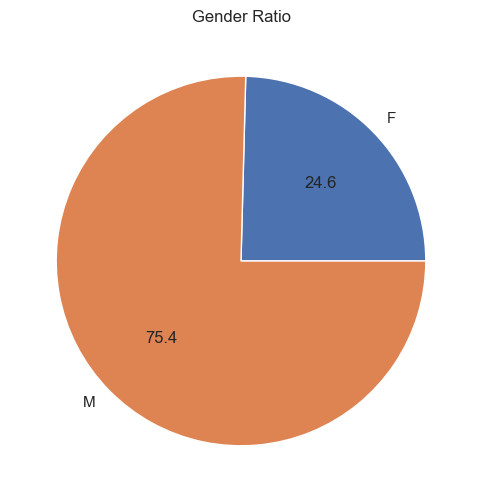

In [110]:
# This pie chart shows the distribution of Gender in the dataset (pie chart)
df.groupby('Gender').size().plot(kind = 'pie',autopct = "%.1f",title='Gender Ratio',figsize=(6,6))

<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

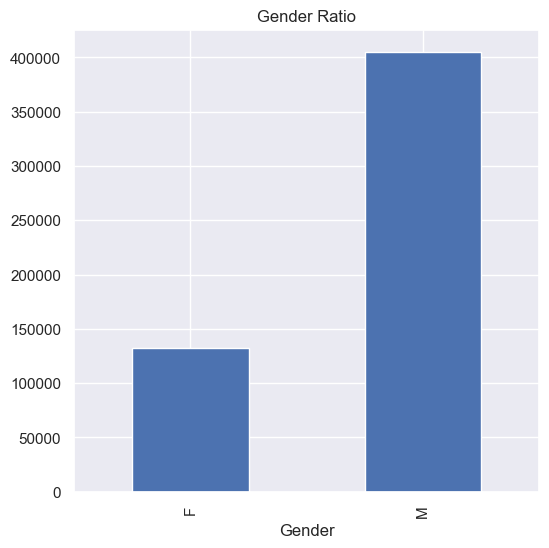

In [111]:
# This bar chart shows the distribution of Gender in the dataset (bar chart)
df.groupby('Gender').size().plot(kind = 'bar',title='Gender Ratio',figsize=(6,6))

--AVERAGE PURCHASE BASED ON AGE COLUMN

In [112]:
df.groupby('Age').size()

Age
0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
dtype: int64

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

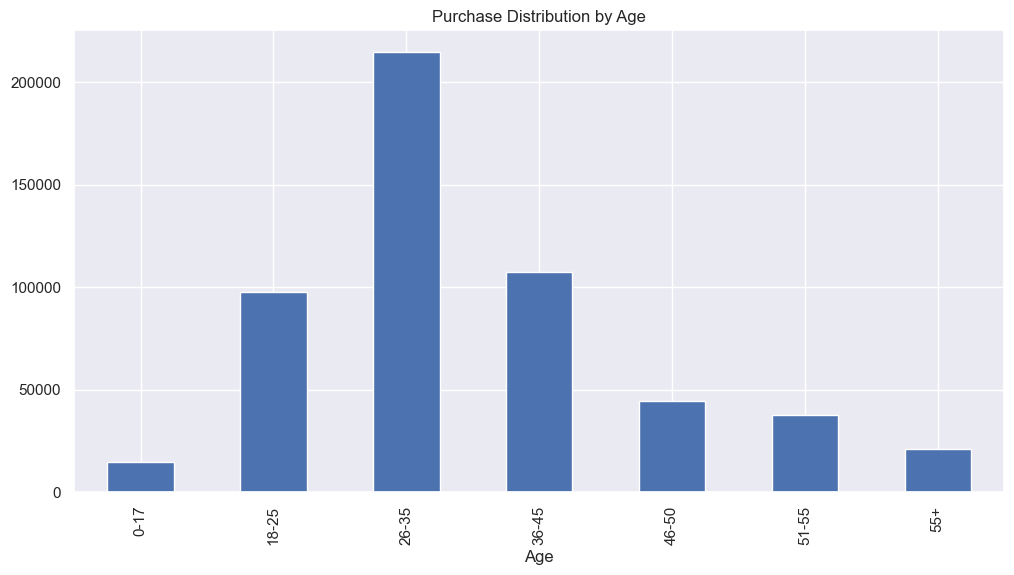

In [113]:
# This bar chart shows the distribution of age in the dataset (bar chart)
df.groupby('Age').size().plot(kind='bar',title='Purchase Distribution by Age',figsize=(12,6))

<Axes: title={'center': 'Purchase Distribution by Age'}>

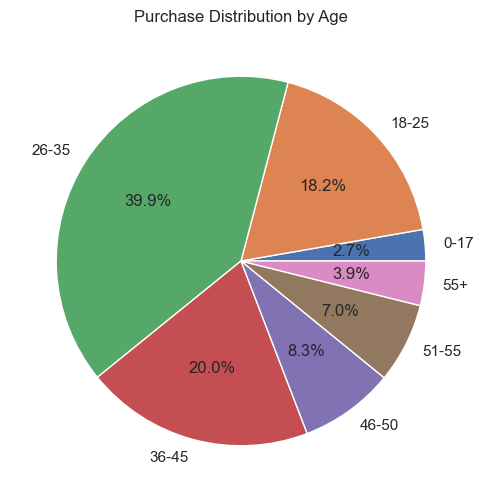

In [114]:
# This pie chart shows the distribution of age in the dataset (pie chart)
df.groupby('Age').size().plot(
    kind='pie',
    autopct='%.1f%%',     
    title='Purchase Distribution by Age',
    figsize=(12,6)
)


-- AVERAGE PURCHASE BASED ON OCCUPATION COLUMN

Text(0.5, 1.0, 'Average Purchase Based on Occupation')

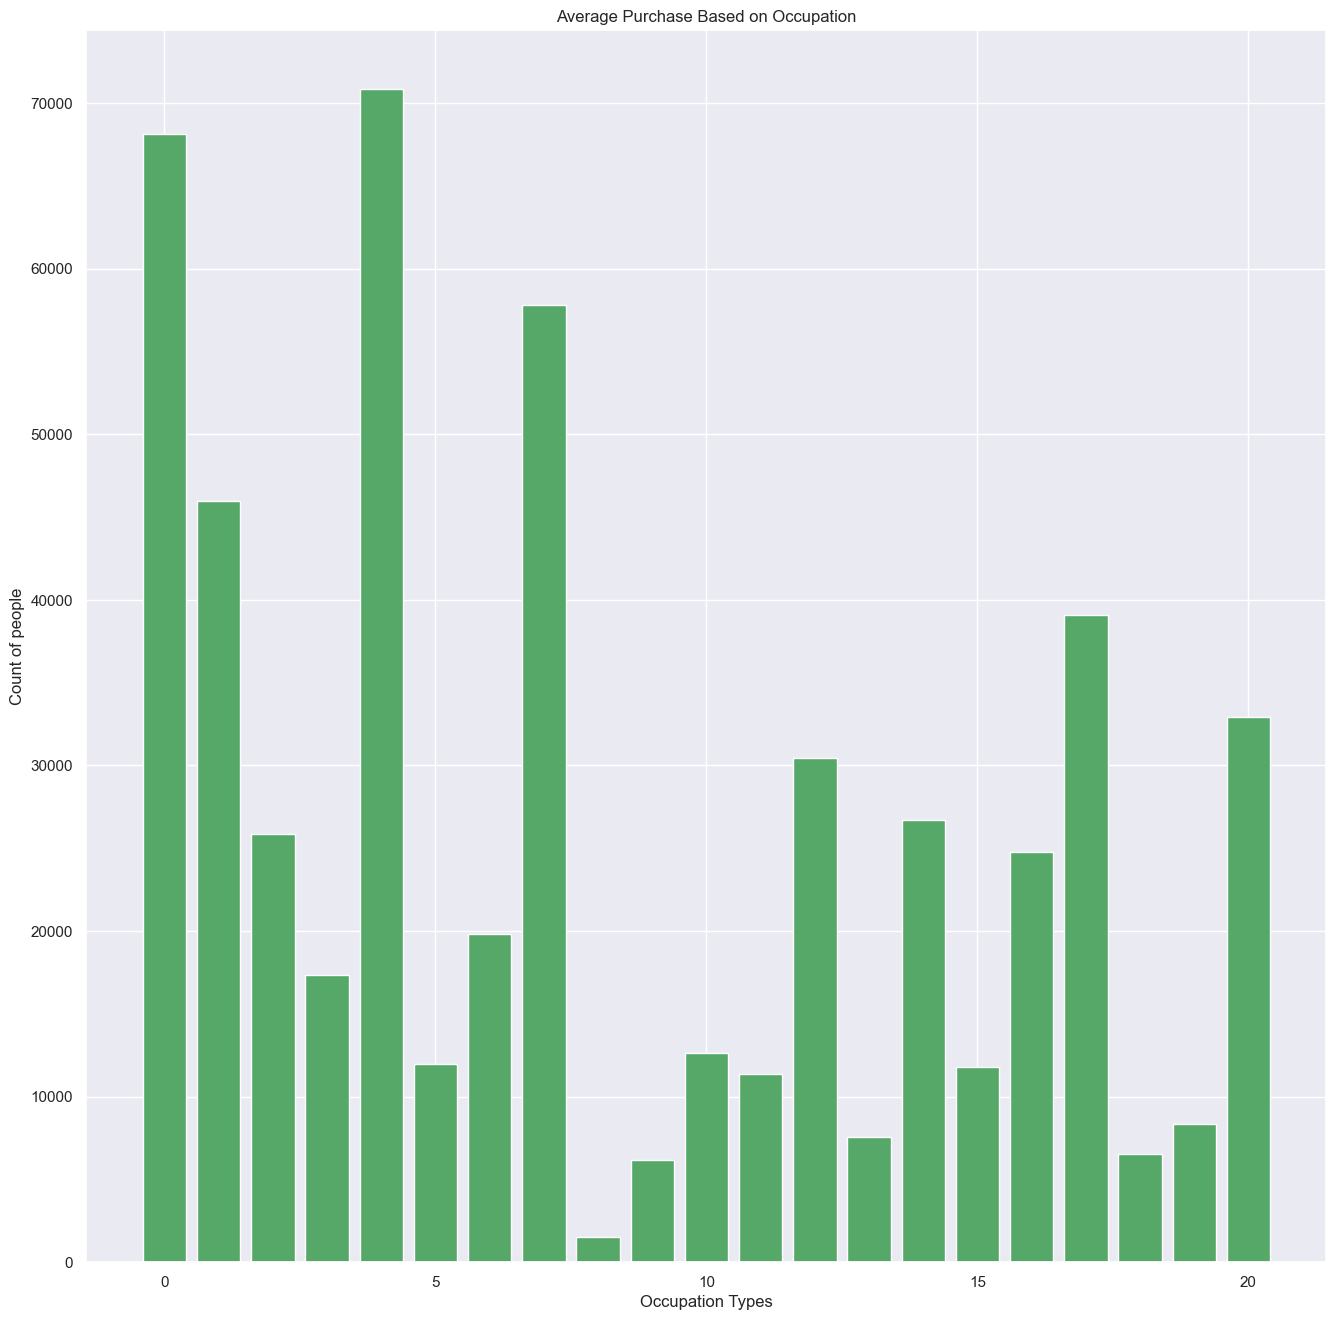

In [115]:
purchase_occupation = df['Occupation'].value_counts()
plt.figure(figsize = (16,16))
plt.bar(purchase_occupation.index, purchase_occupation.values, color ='g')
plt.xlabel('Occupation Types')
plt.ylabel('Count of people')
plt.title('Average Purchase Based on Occupation')


--  AVERAGE PURCHASE BASED ON MARITAL_STATUS COLUMN

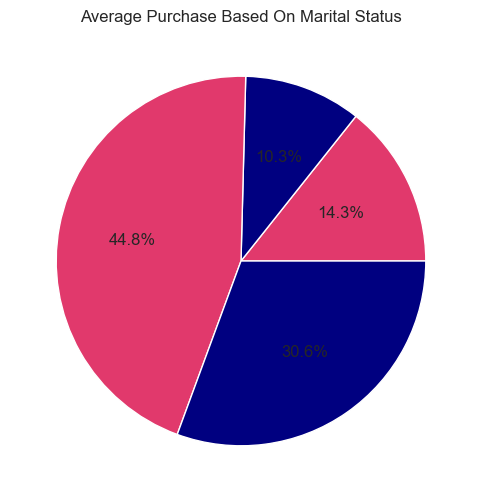

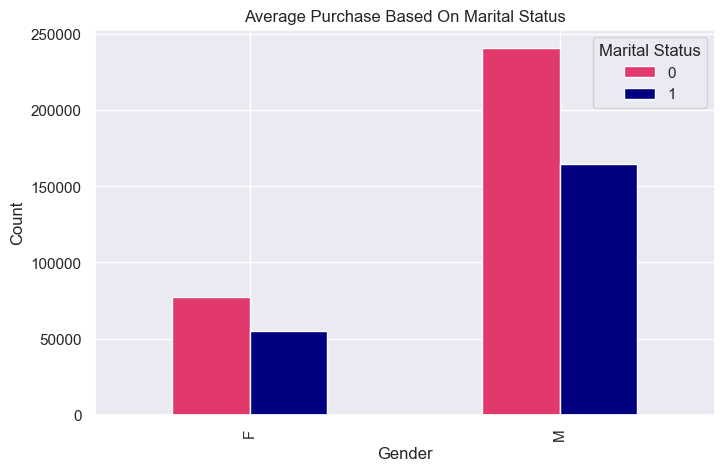

In [116]:
import matplotlib.pyplot as plt

# Group by Gender and Marital_Status, then count occurrences
purchase_marital_status = df.groupby(['Gender', 'Marital_Status']).size()

# PIE CHART
plt.figure(figsize=(6,6))
colors = ['#E1396C', '#000080']
plt.pie(purchase_marital_status,autopct='%.1f%%', colors=colors)
plt.title("Average Purchase Based On Marital Status")
plt.show()

# BAR CHART
purchase_marital_status.unstack(level=1).plot(kind='bar', figsize=(8,5), color=['#E1396C', '#000080'])
plt.title("Average Purchase Based On Marital Status")
plt.ylabel("Count")
plt.legend(title="Marital Status")
plt.show()


-- AVERAGE PURCHASE BASED ON CITY COLUMN

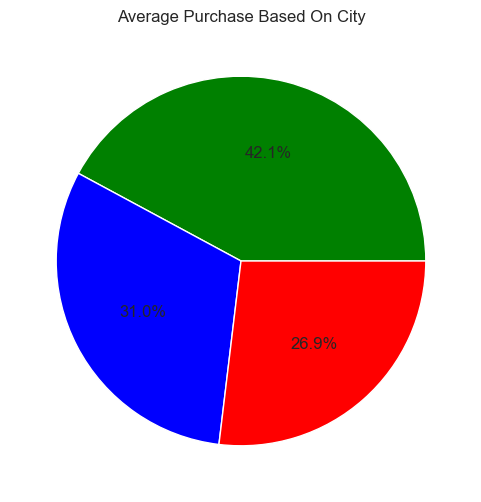

In [117]:
# Calculate counts for each City_Category.
purchase_city = df['City_Category'].value_counts()
colors = ['green','blue','red']
# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(purchase_city,  
        autopct='%.1f%%', 
        colors=colors)
plt.title("Average Purchase Based On City")
plt.show()


-- PRODUCT PURCHASED BASED UPON AGE

In [118]:
lst =[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])


data = pd.DataFrame(lst,columns=['Age', 'Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

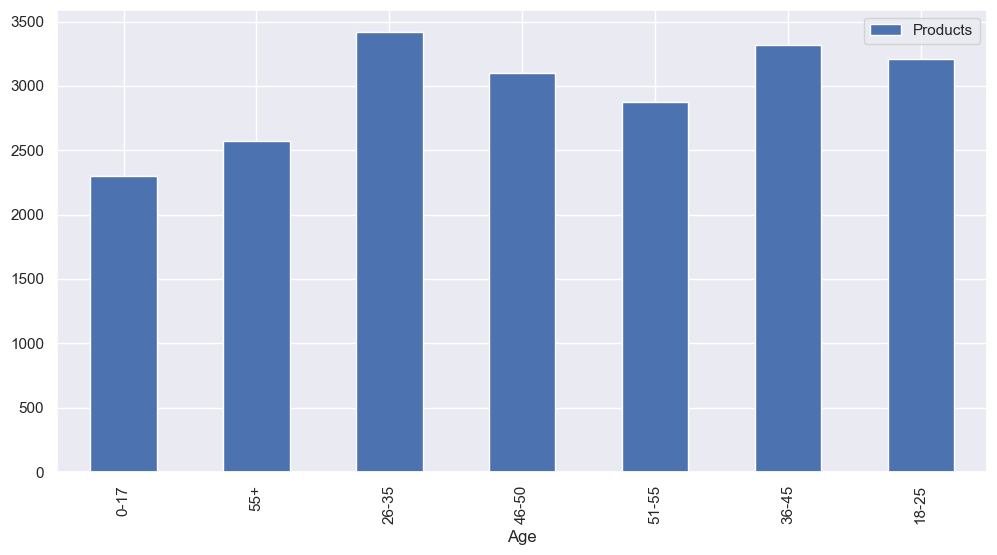

In [119]:
data.plot.bar(x='Age')  # bar chart

-- PURCHASES DONE  BASED UPON AGE 

<Axes: title={'center': 'Amount spent by Age'}, xlabel='Age'>

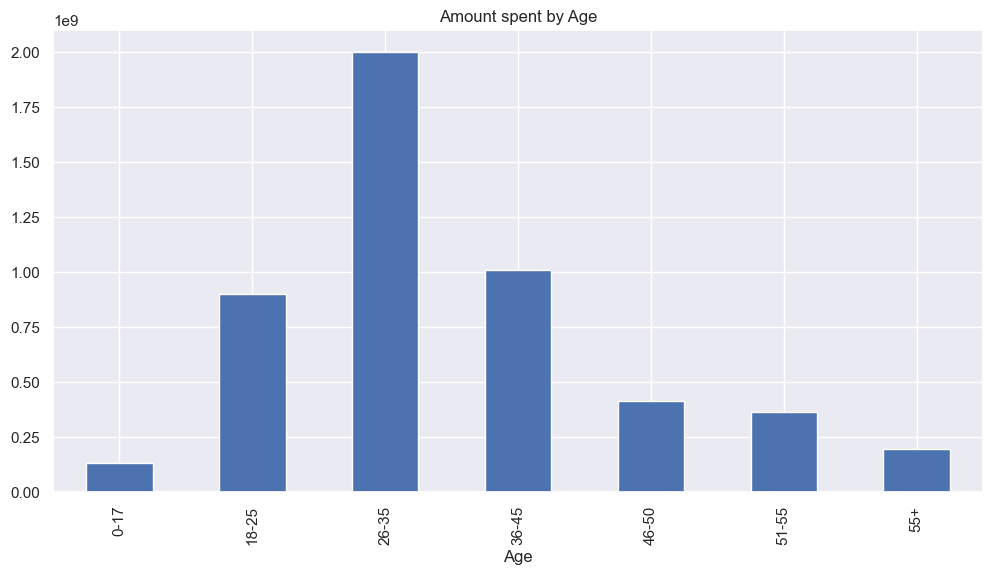

In [120]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',title='Amount spent by Age')

-- AVERAGE PURCHASE BASED UPON AGE

<Axes: title={'center': 'Average Purchase by Age'}, ylabel='Purchase'>

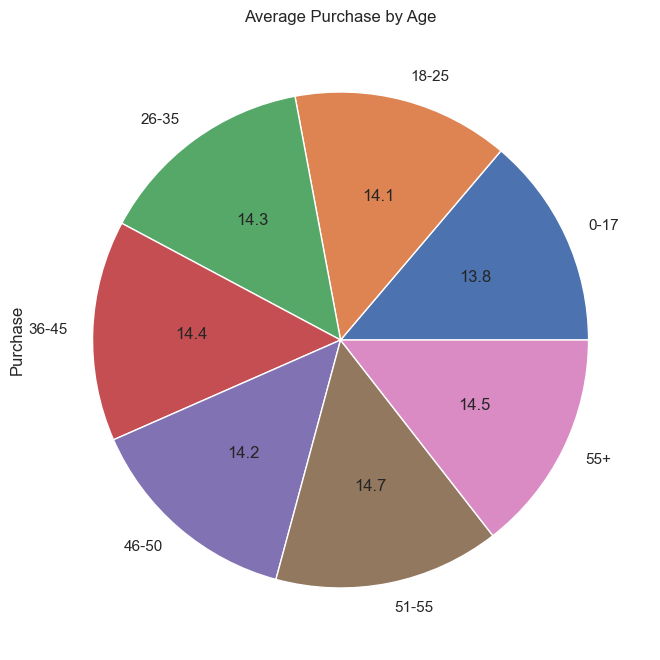

In [121]:

df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')
df = df.dropna(subset=['Purchase'])
df.groupby('Age')['Purchase'].mean().plot(kind='pie', autopct='%.1f', figsize=(8,9),title='Average Purchase by Age')



-- AVERAGE PURCHASE BASED UPON MARITAL STATUS

<Axes: title={'center': 'Average Purchase by Marital Status'}, ylabel='Purchase'>

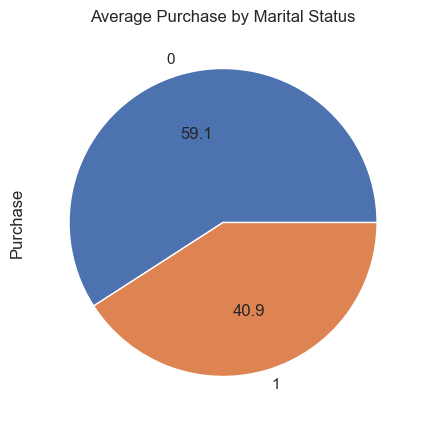

In [122]:

df.groupby('Marital_Status')['Purchase'].size().plot(kind='pie', autopct='%.1f', figsize=(5,5),title='Average Purchase by Marital Status')



Multiple Column Analysing

In [123]:
import seaborn as sns

-- VISUALIZATION OF GENDER AND AGE COLUMN TOGETHER

<Axes: xlabel='Age', ylabel='count'>

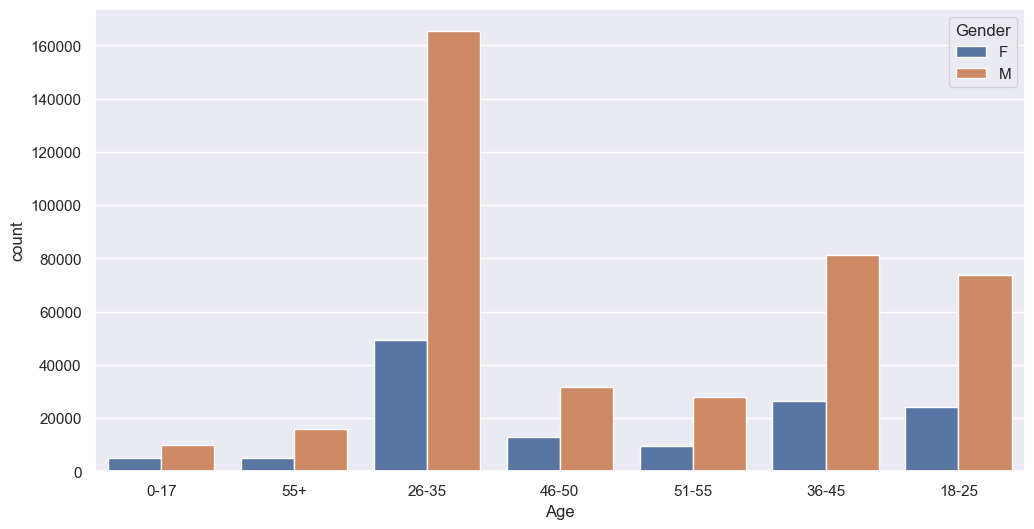

In [124]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Age',hue='Gender',data=df)

-- VISUALIZATION OF GENDER AND MARITAL STATUS COLUMN TOGETHER

<Axes: xlabel='Gender', ylabel='count'>

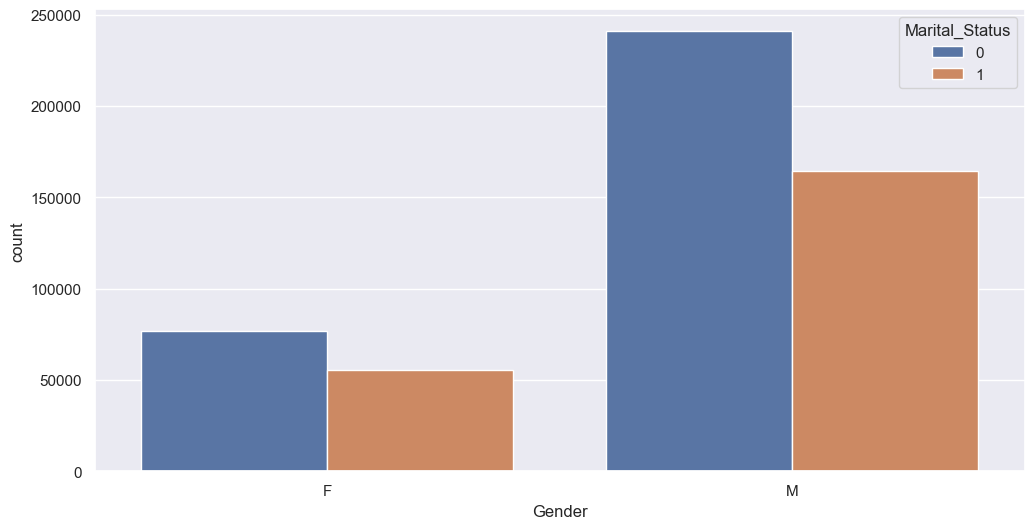

In [125]:

sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x='Gender',hue='Marital_Status',data=df)

-- WHICH CITY_CATEGORY IS THE LARGEST IN FREQUENCY ?

<Axes: xlabel='City_Category', ylabel='count'>

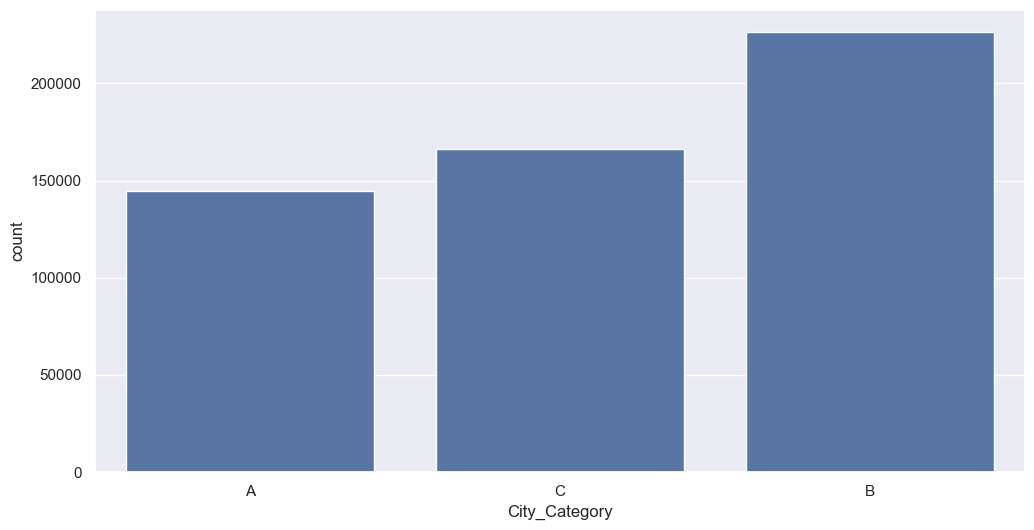

In [126]:
sns.countplot(x = df['City_Category'])

<Axes: >

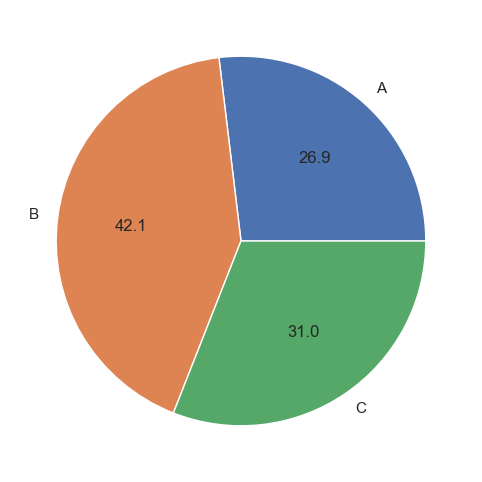

In [127]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%.1f')

-- CITY CATEGORY BASED UPON AGE

<Axes: xlabel='City_Category', ylabel='count'>

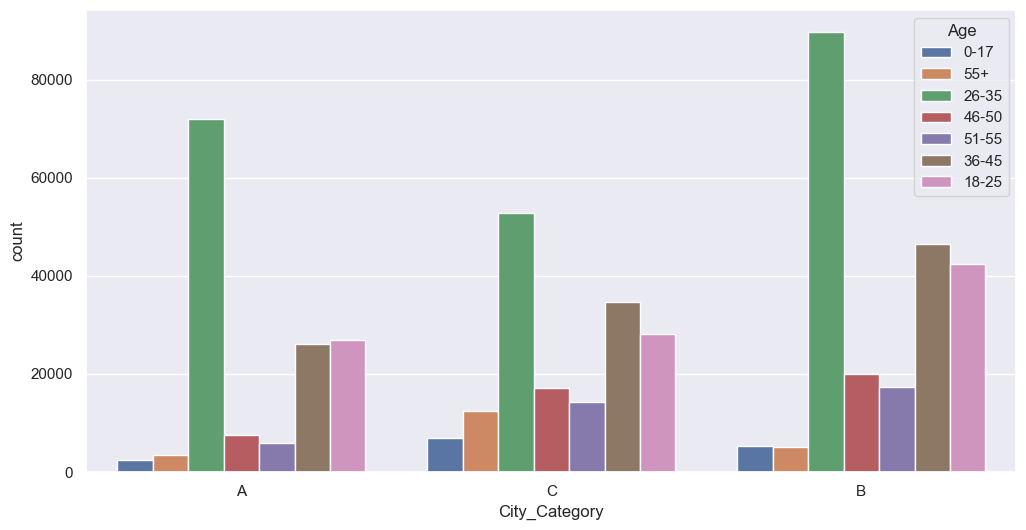

In [128]:
sns.countplot(x = 'City_Category',hue='Age',data=df)

-- CITY CATEGORY BASED UPON MARITAL STATUS

<Axes: xlabel='City_Category', ylabel='count'>

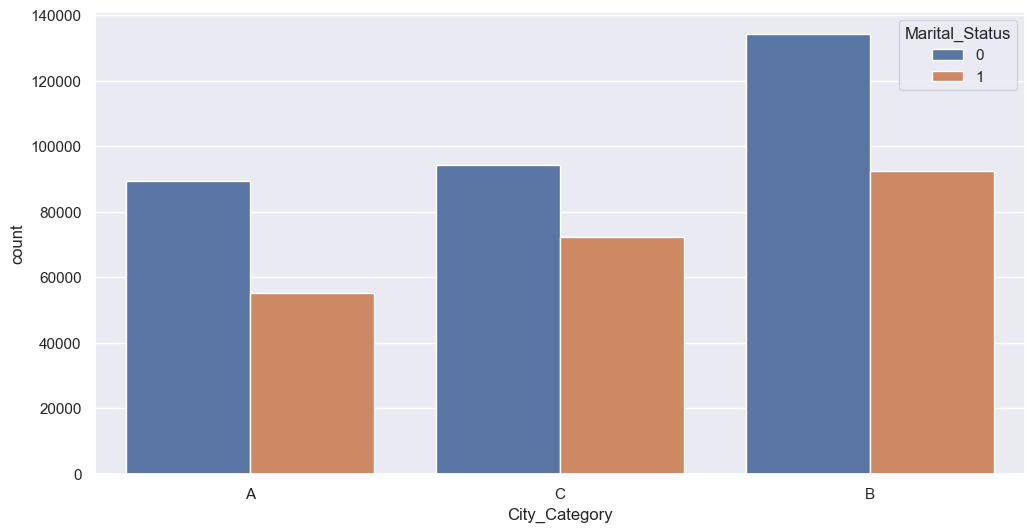

In [129]:
sns.countplot(x = 'City_Category',hue='Marital_Status',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

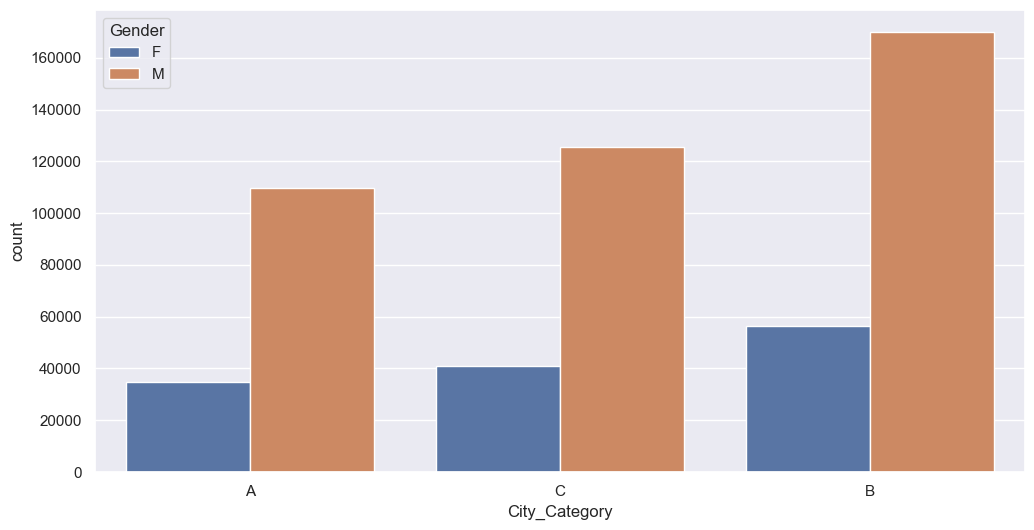

In [130]:
sns.countplot(x = 'City_Category',hue='Gender',data=df)

-- AMOUNT OF PURCHASE BASED UPON CITY CATEGORY

<Axes: ylabel='Purchase'>

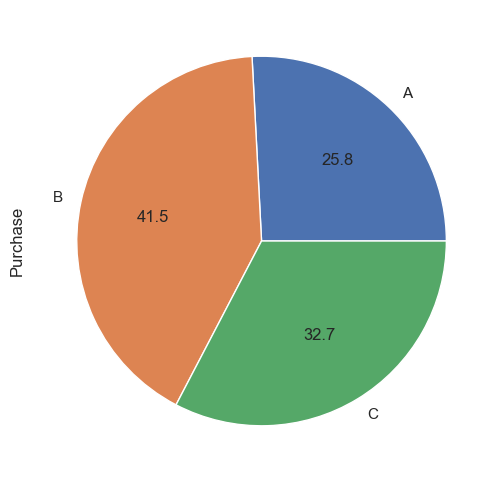

In [131]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%.1f')

-- AVERAGE(MEAN) PURCHASE AMOUNT BY CITY CATEGORY

<Axes: title={'center': 'Average Purchase Amount by City Category'}, ylabel='Purchase'>

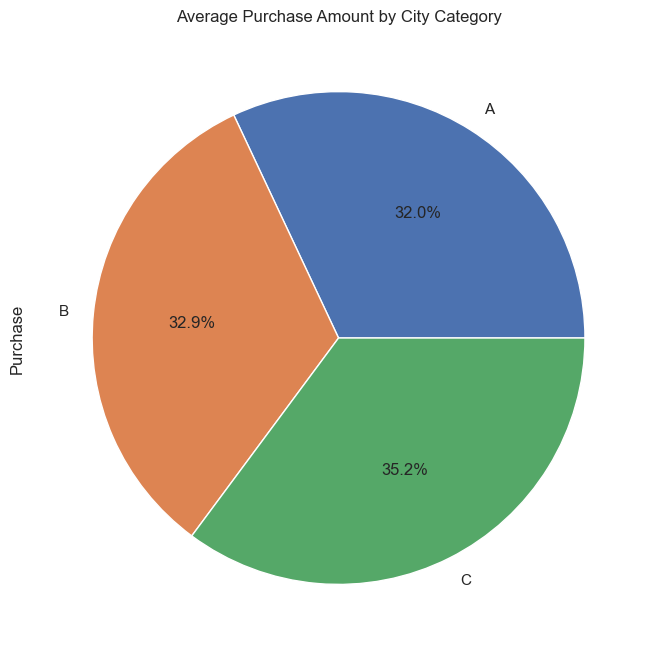

In [132]:

# Ensure the Purchase column is numeric
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Remove missing values if any
df = df.dropna(subset=['Purchase'])

# Generate the pie chart for average purchase amount by city category
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie', autopct='%.1f%%', figsize=(8, 8),title='Average Purchase Amount by City Category')

-- FREQUENCY OF THE CURRENT CITY STAYING YEARS OF THE CUSTOMERS

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

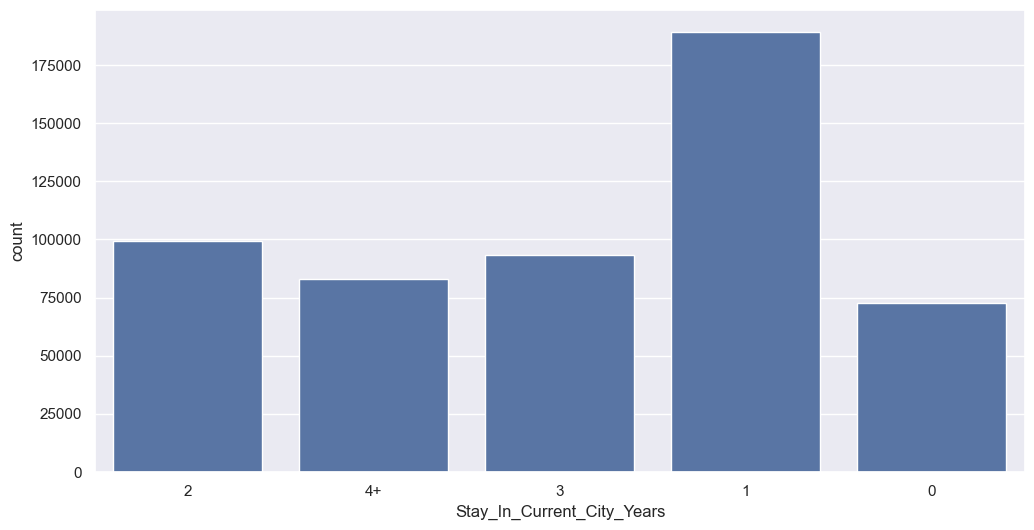

In [133]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: >

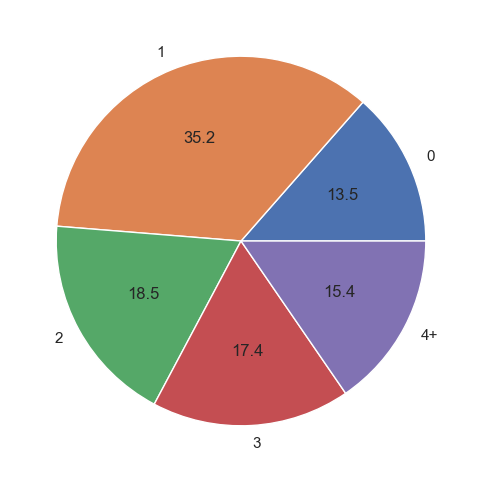

In [134]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%.1f')

-- CUSTOMERS LIVING IN THEIR CURRENT CITY FOR A YEARS BASED ON GENDER

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

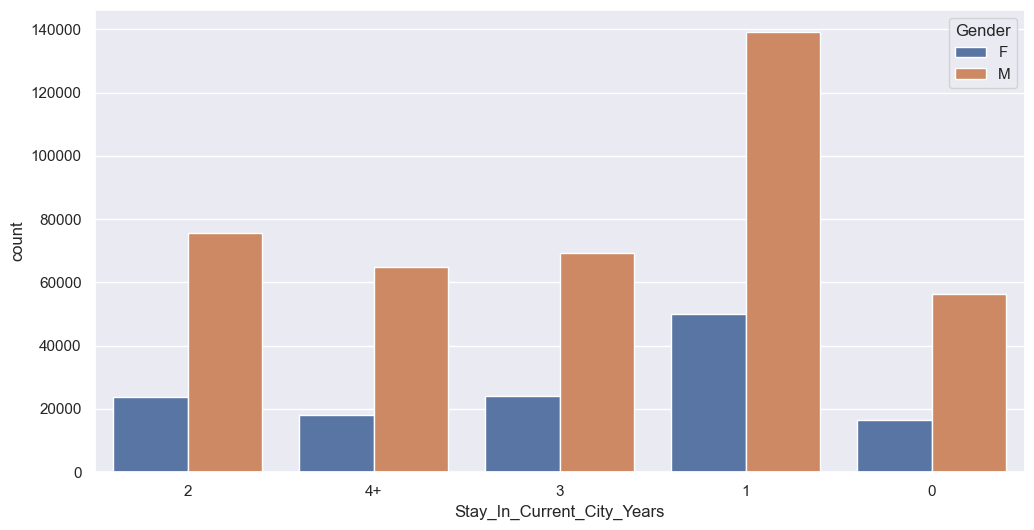

In [135]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='Gender',data=df)

-- CUSTOMERS LIVING IN THEIR CURRENT CITY FOR A YEARS BASED ON MARITAL STATUS

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

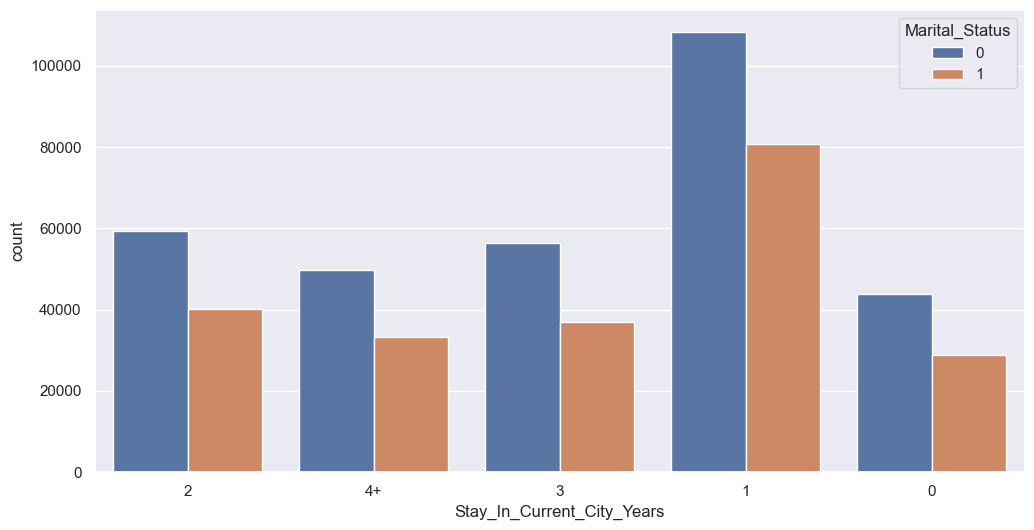

In [136]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='Marital_Status',data=df)

-- CUSTOMERS LIVING IN THEIR CURRENT CITY FOR A YEARS BASED ON CITY CATEGORY

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

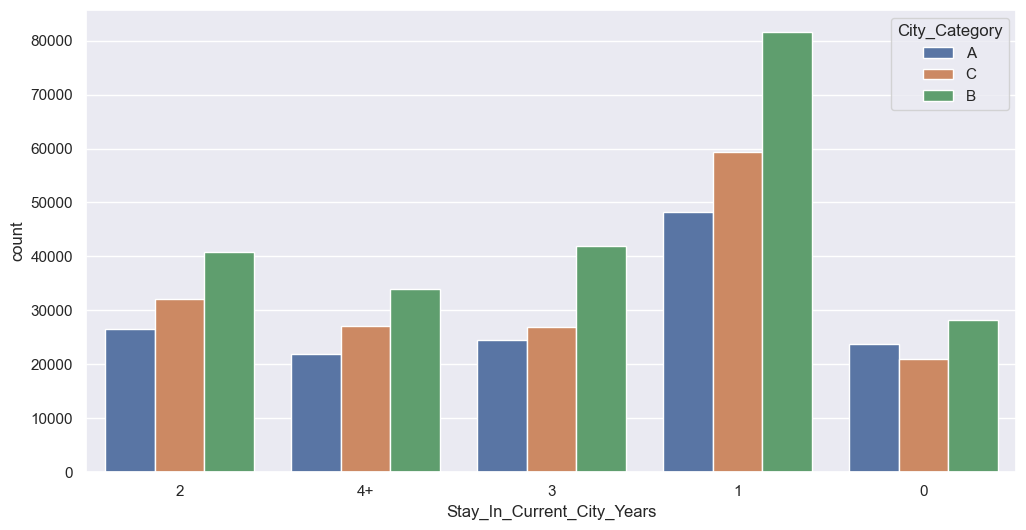

In [137]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue='City_Category',data=df)

-- FREQUENCY OF OCCUPATION (WHICH HAS HIGHEST FREQUNECY OCCUPATION)

<Axes: xlabel='Occupation'>

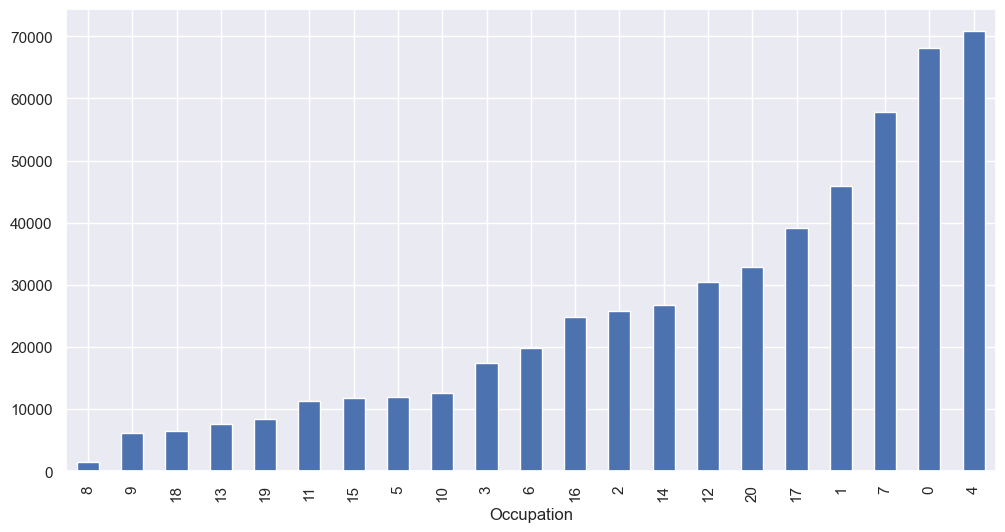

In [138]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

-- BASED UPON PURCHASE, WHICH OCCUPATION HAS HIGHEST PURCHASES

<Axes: xlabel='Occupation'>

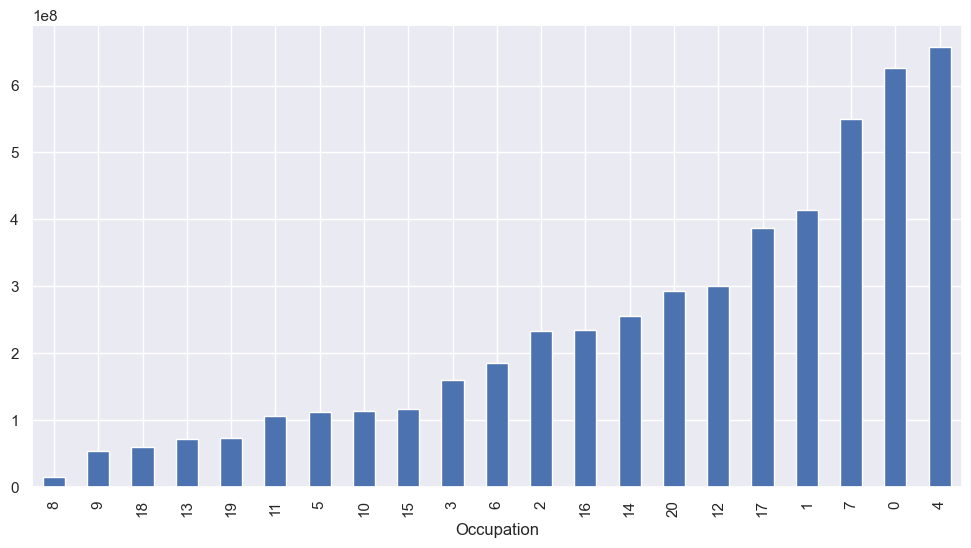

In [139]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

-- BASED UPON MARITAL STATUS, WHICH OCCUPATION HAS HIGHEST PURCHASES

<Axes: xlabel='Occupation', ylabel='count'>

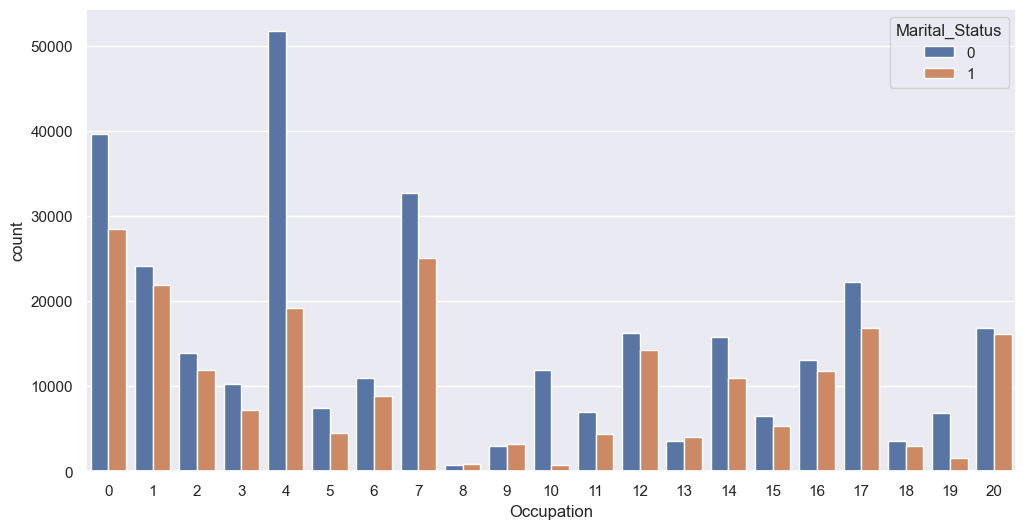

In [140]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

-- BASED UPON GENDER, WHICH OCCUPATION HAS HIGHEST PURCHASES

<Axes: xlabel='Occupation', ylabel='count'>

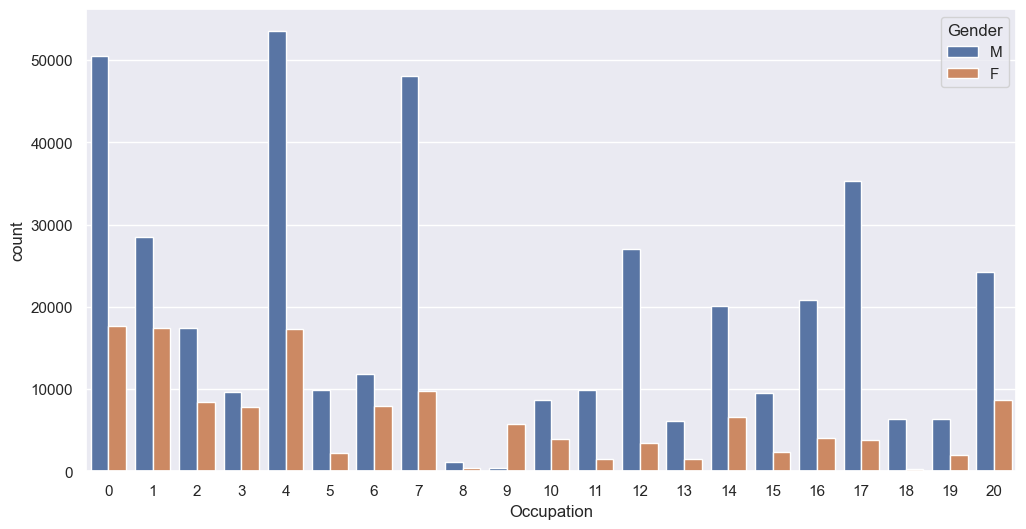

In [141]:
sns.countplot(x='Occupation',hue='Gender',data=df)

PRODUCT CATEGORY ANALYSIS INDIVIDUALLY

<Axes: xlabel='Product_Category_1'>

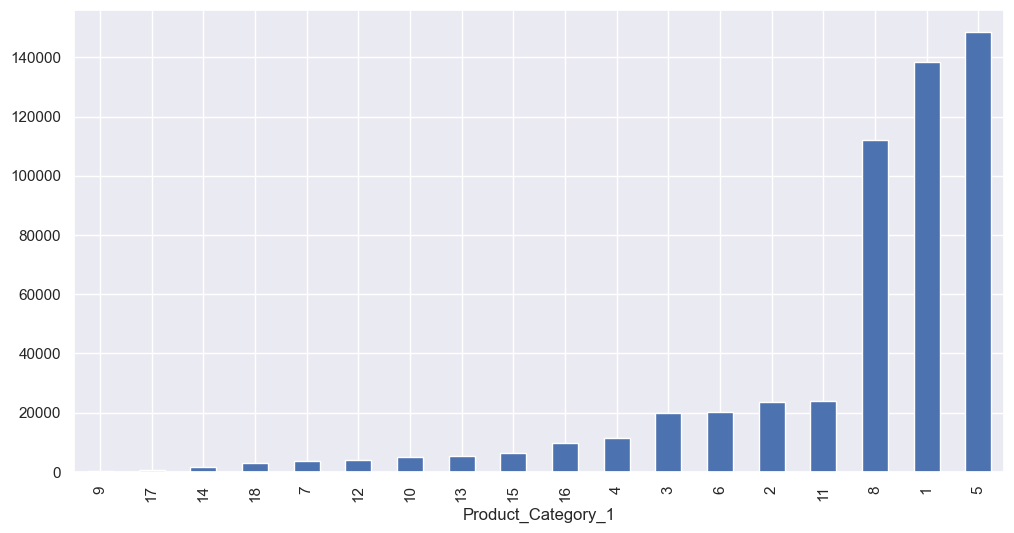

In [142]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_2'>

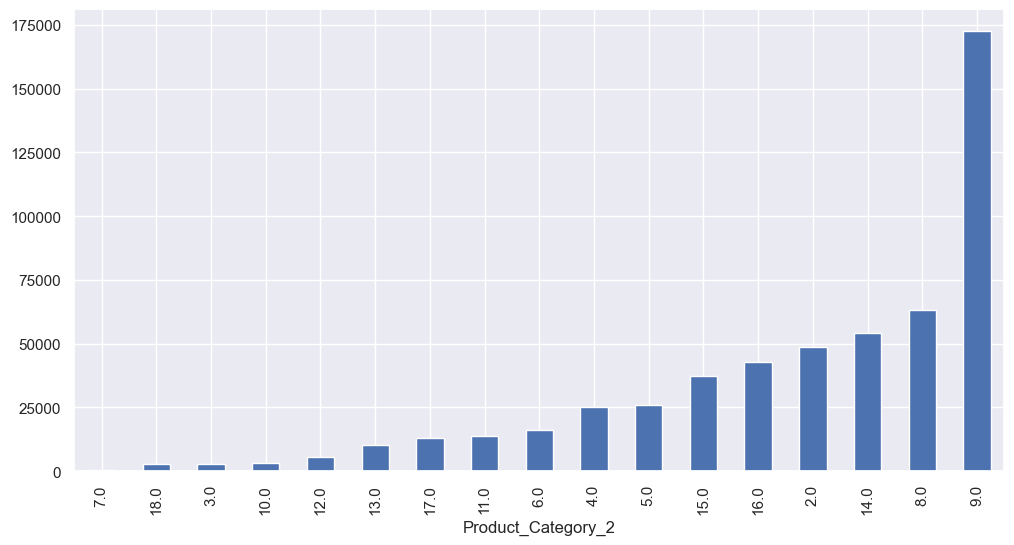

In [143]:
df.groupby('Product_Category_2').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_3'>

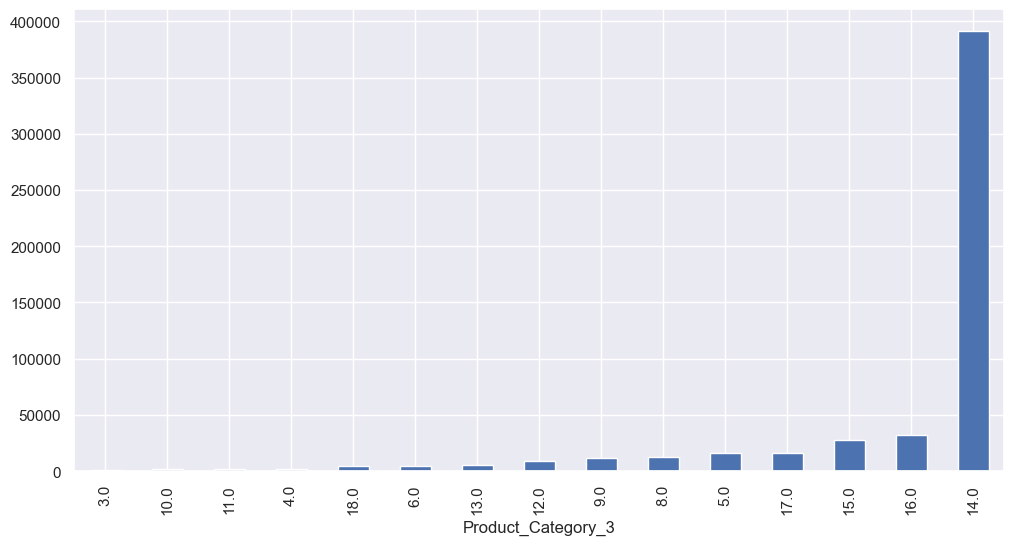

In [144]:
df.groupby('Product_Category_3').size().sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 1 (WHICH HAS HIGHEST ?)

<Axes: xlabel='Product_Category_1'>

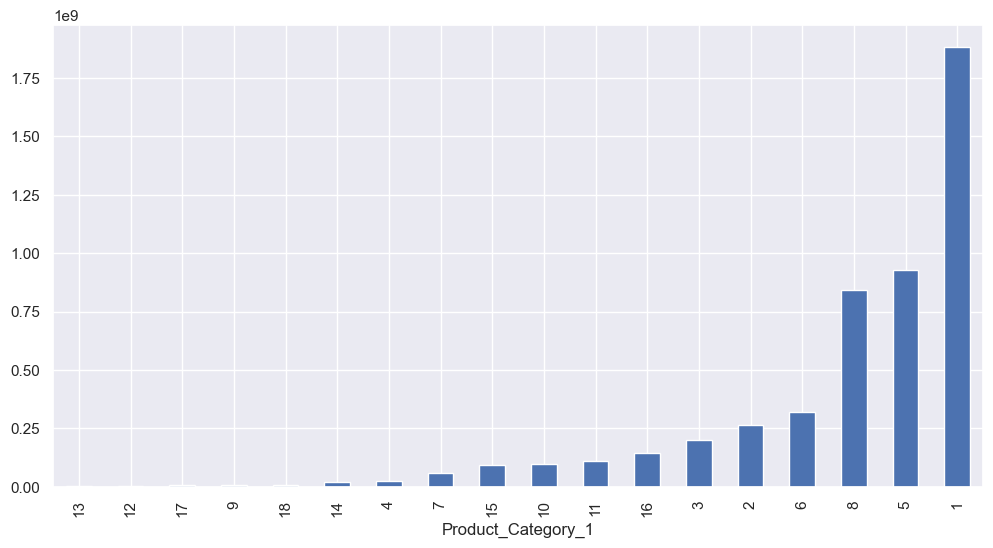

In [145]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 2 (WHICH HAS HIGHEST ?)

<Axes: xlabel='Product_Category_2'>

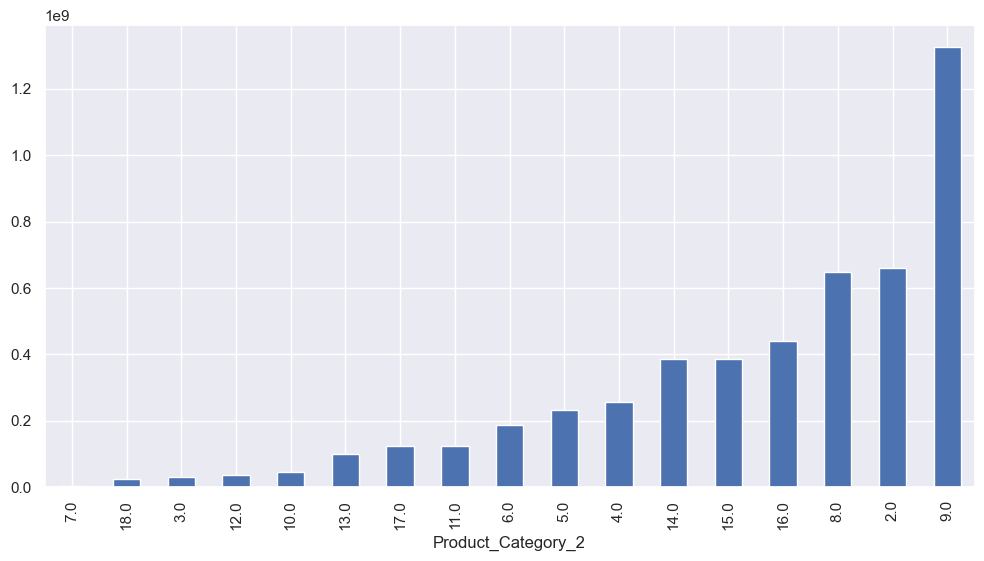

In [146]:
df.groupby('Product_Category_2').sum()['Purchase'].sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 3 (WHICH HAS HIGHEST ?)

<Axes: xlabel='Product_Category_3'>

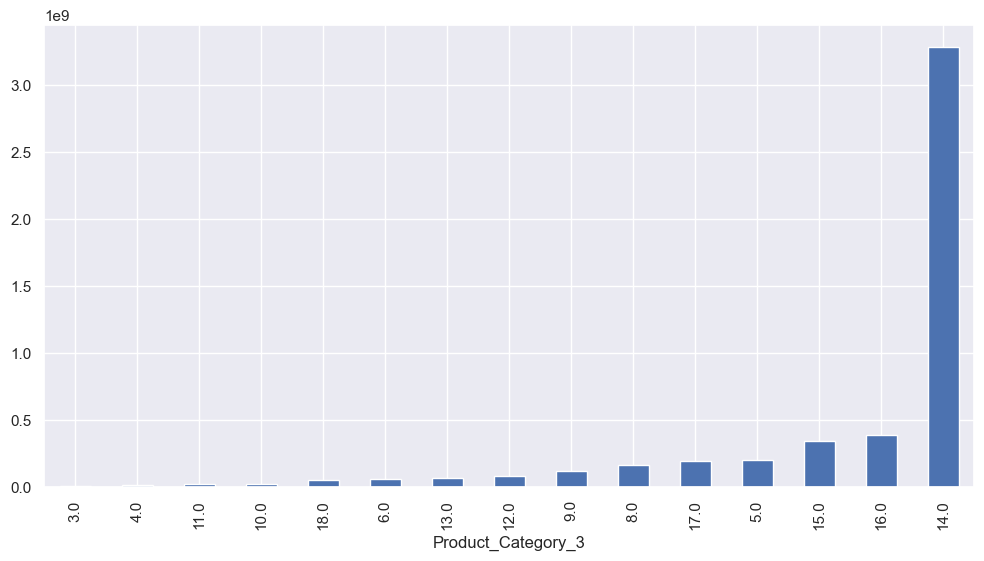

In [147]:
df.groupby('Product_Category_3').sum()['Purchase'].sort_values().plot(kind='bar')

-- PURCHASES DONE BY PRODUCT CATEGORY 1 (WHICH HAS HIGHEST ?)

Text(0.5, 1.0, 'Average Purchase Amount by Product Category 1')

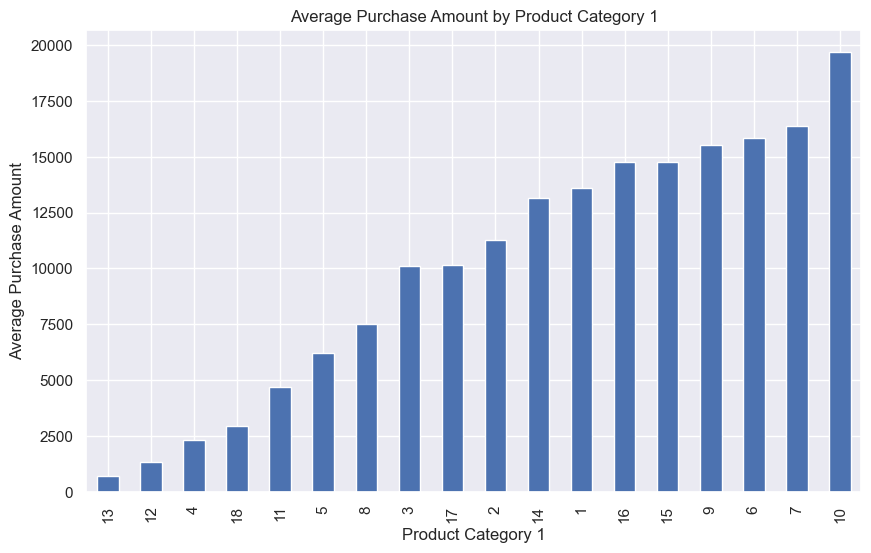

In [148]:
# Convert the Purchase column to numeric, setting non-numeric values to NaN
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Remove rows with NaN in the Purchase column
df = df.dropna(subset=['Purchase'])

# Group by Product_Category_1 and calculate the mean Purchase amount
mean_purchase_by_category = df.groupby('Product_Category_1')['Purchase'].mean()

# Sort the mean purchase amounts in ascending order
sorted_mean_purchase_by_category = mean_purchase_by_category.sort_values()

# Generate the bar chart
sorted_mean_purchase_by_category.plot(kind='bar', figsize=(10, 6))

# Display the plot
plt.xlabel('Product Category 1')  # Label for the x-axis
plt.ylabel('Average Purchase Amount')  # Label for the y-axis
plt.title('Average Purchase Amount by Product Category 1')

-- PURCHASES DONE BY PRODUCT CATEGORY 2 (WHICH HAS HIGHEST ?)

Text(0.5, 1.0, 'Average Purchase Amount by Product Category 2')

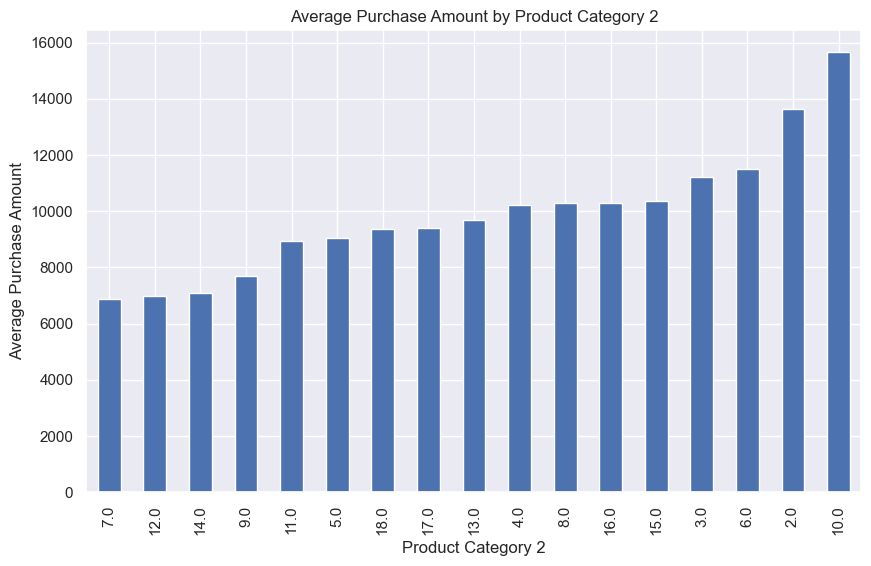

In [149]:
# Convert the Purchase column to numeric, setting non-numeric values to NaN
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Remove rows with NaN in the Purchase column
df = df.dropna(subset=['Purchase'])

# Group by Product_Category_1 and calculate the mean Purchase amount
mean_purchase_by_category = df.groupby('Product_Category_2')['Purchase'].mean()

# Sort the mean purchase amounts in ascending order
sorted_mean_purchase_by_category = mean_purchase_by_category.sort_values()

# Generate the bar chart
sorted_mean_purchase_by_category.plot(kind='bar', figsize=(10, 6))

# Display the plot
plt.xlabel('Product Category 2')  # Label for the x-axis
plt.ylabel('Average Purchase Amount')  # Label for the y-axis
plt.title('Average Purchase Amount by Product Category 2')

-- PURCHASES DONE BY PRODUCT CATEGORY 3 (WHICH HAS HIGHEST ?)

Text(0.5, 1.0, 'Average Purchase Amount by Product Category 3')

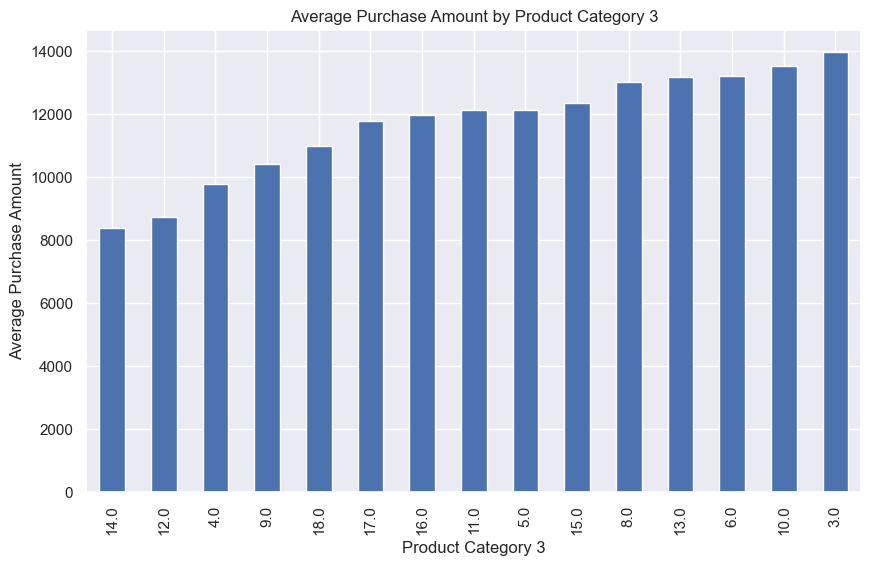

In [150]:
# Convert the Purchase column to numeric, setting non-numeric values to NaN
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')

# Remove rows with NaN in the Purchase column
df = df.dropna(subset=['Purchase'])

# Group by Product_Category_1 and calculate the mean Purchase amount
mean_purchase_by_category = df.groupby('Product_Category_3')['Purchase'].mean()

# Sort the mean purchase amounts in ascending order
sorted_mean_purchase_by_category = mean_purchase_by_category.sort_values()

# Generate the bar chart
sorted_mean_purchase_by_category.plot(kind='bar', figsize=(10, 6))

# Display the plot
plt.xlabel('Product Category 3')  # Label for the x-axis
plt.ylabel('Average Purchase Amount')  # Label for the y-axis
plt.title('Average Purchase Amount by Product Category 3')

-- PRODUCT CATEGORY 1 BASED UPON GENDER

<Axes: xlabel='Product_Category_1', ylabel='count'>

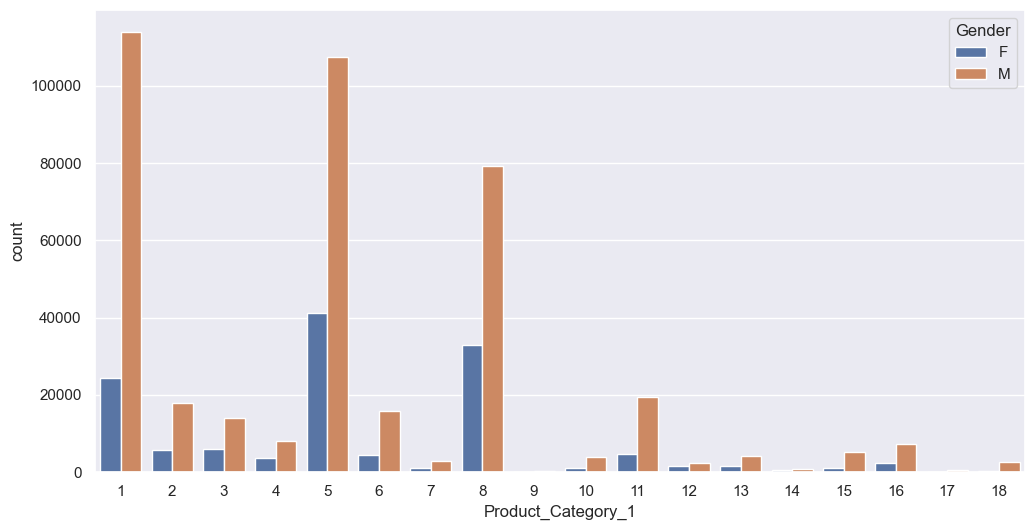

In [151]:
sns.countplot(x='Product_Category_1',hue='Gender',data=df)

-- PRODUCT CATEGORY 2 BASED UPON GENDER

<Axes: xlabel='Product_Category_2', ylabel='count'>

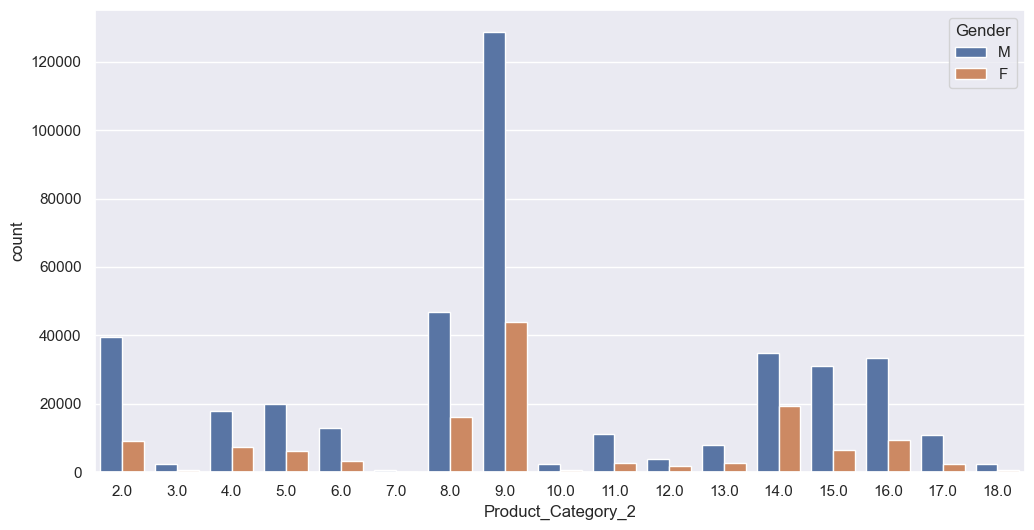

In [152]:
sns.countplot(x='Product_Category_2',hue='Gender',data=df)


-- PRODUCT CATEGORY 3 BASED UPON GENDER

<Axes: xlabel='Product_Category_3', ylabel='count'>

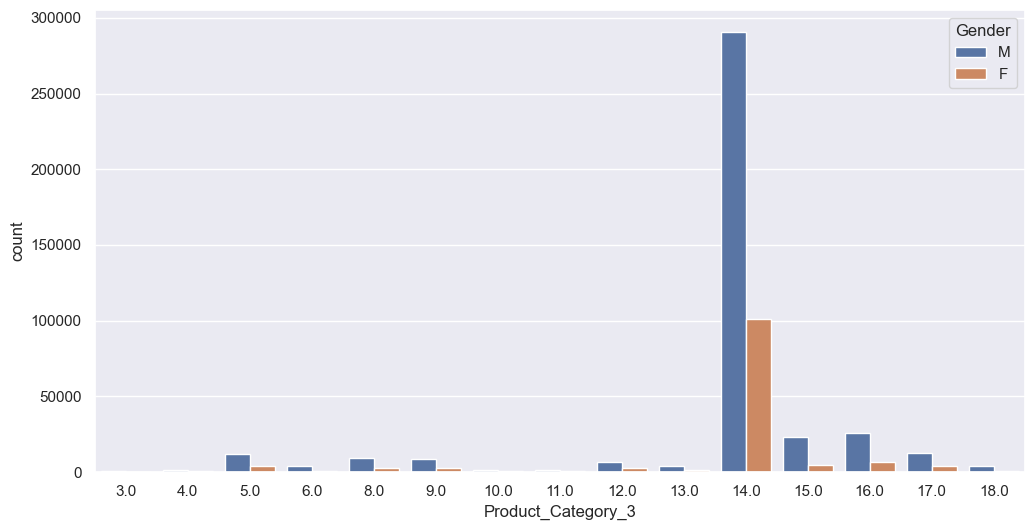

In [153]:
sns.countplot(x='Product_Category_3',hue='Gender',data=df)


--VISUALIZATION OF GENDER AND AGE COLUMN TOGETHER

In [154]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df["Marital_Status"][i]))
    
df["Marital_Gender"]=l

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,14.0,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,14.0,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969,M_0


-- AGE BASED UPON MARITAL GENDER

<Axes: xlabel='Age', ylabel='count'>

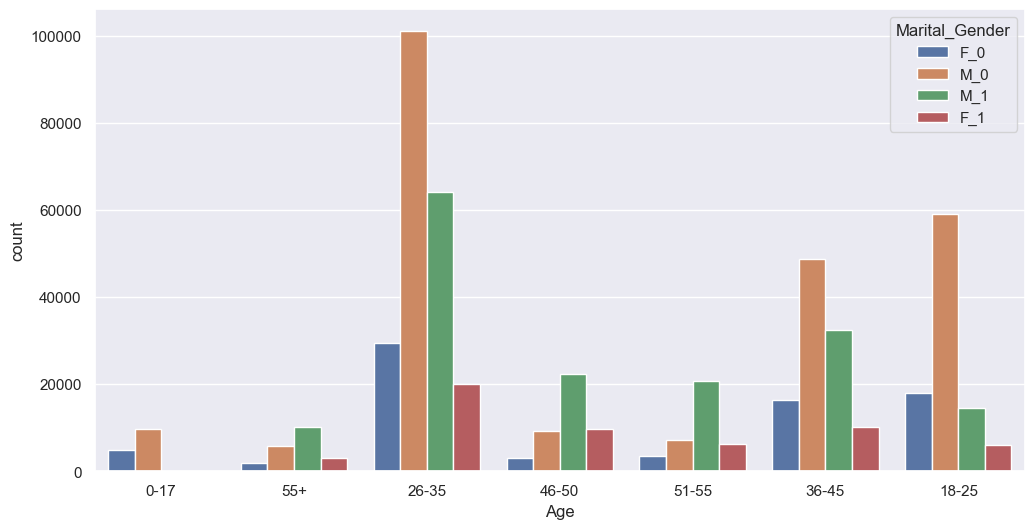

In [155]:
sns.countplot(x=df['Age'],hue=df['Marital_Gender'])

  -- MARITAL GENDER BASED UPON STAY IN CURRENT CITY YEARS COLOUMN

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

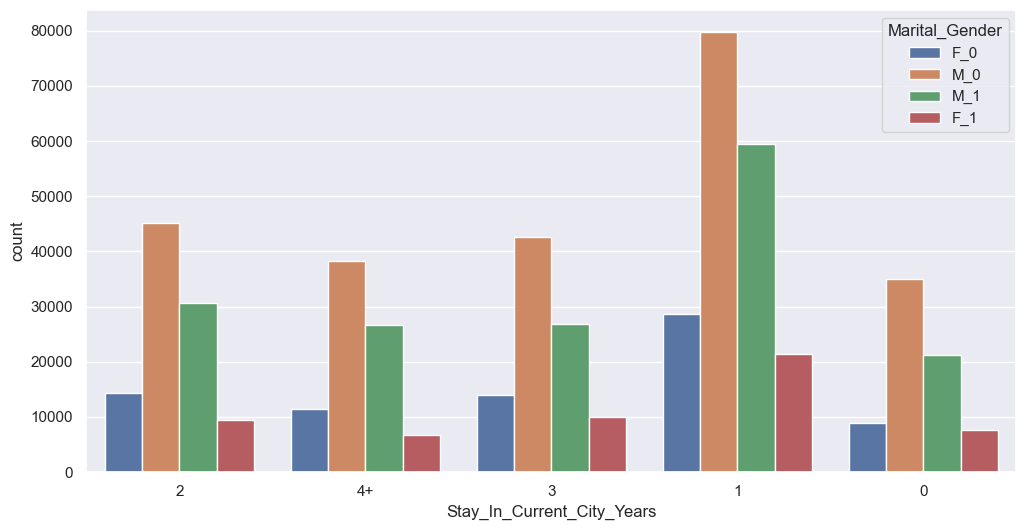

In [156]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['Marital_Gender'])

-- CITY CATEGORY BASED UPON MARITAL GENDER

<Axes: xlabel='City_Category', ylabel='count'>

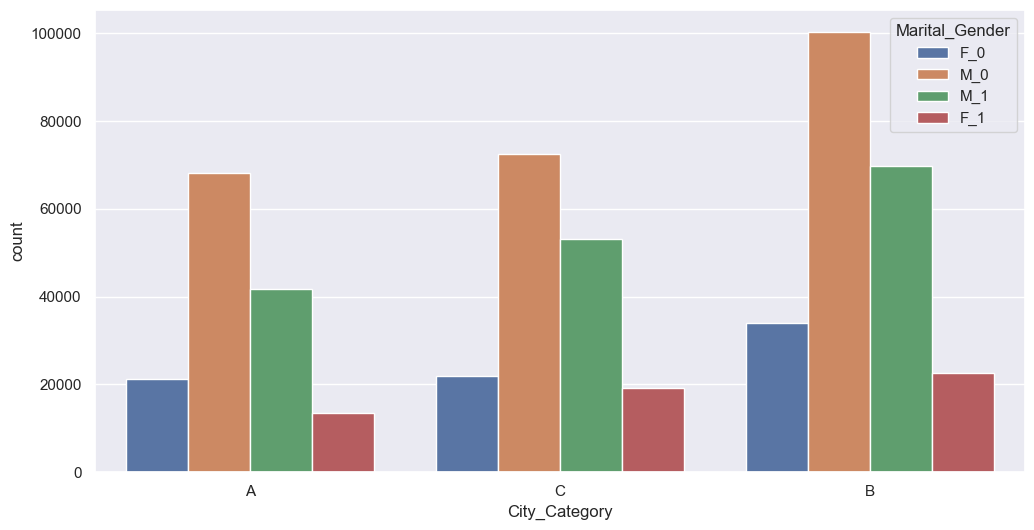

In [157]:
sns.countplot(x=df['City_Category'],hue=df['Marital_Gender'])

-- WHICH MARITAL GENDER HAS HIGHEST IN FREQUENCY ?

<Axes: xlabel='Marital_Gender', ylabel='count'>

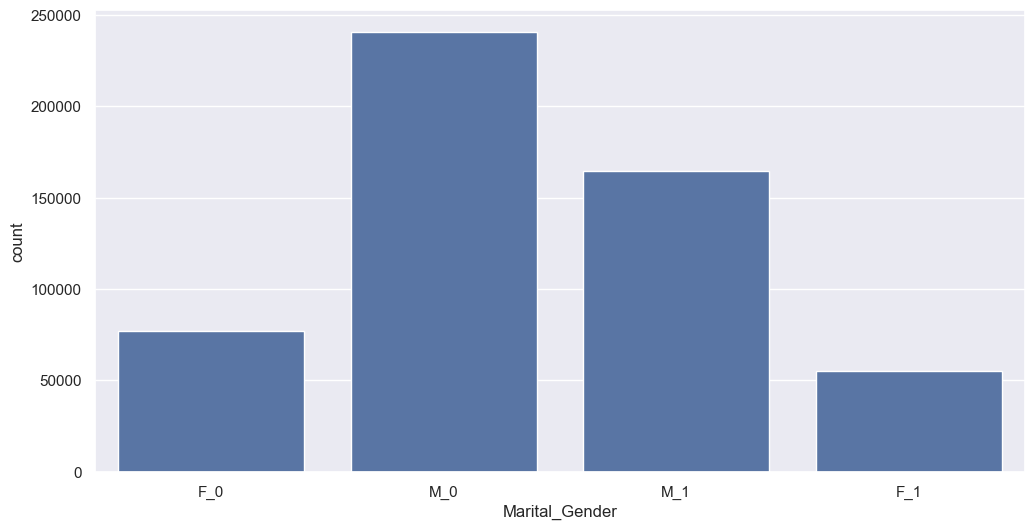

In [158]:
sns.countplot(x=df['Marital_Gender'])

CORRELATION MATRIX

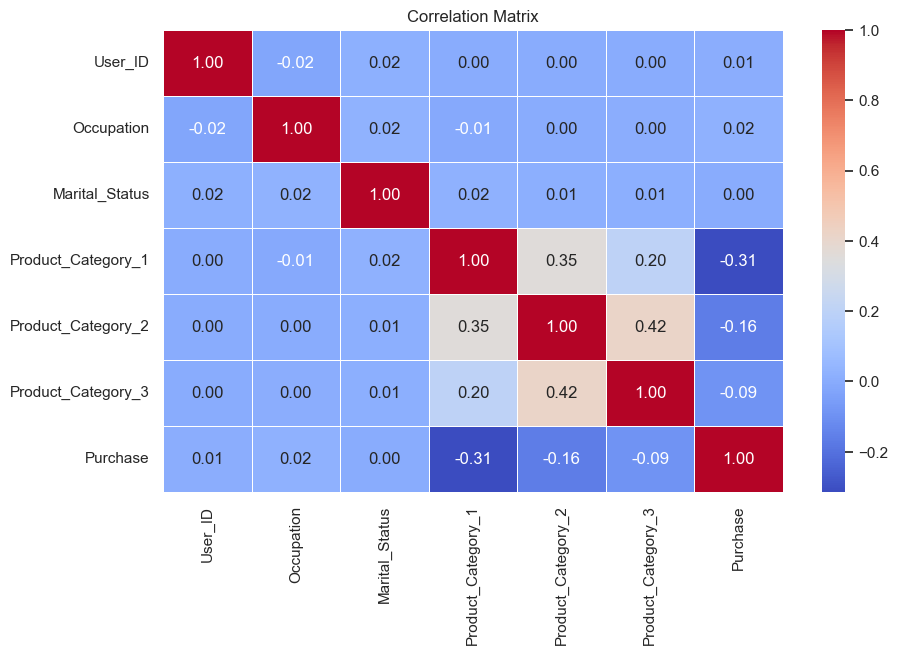

In [165]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

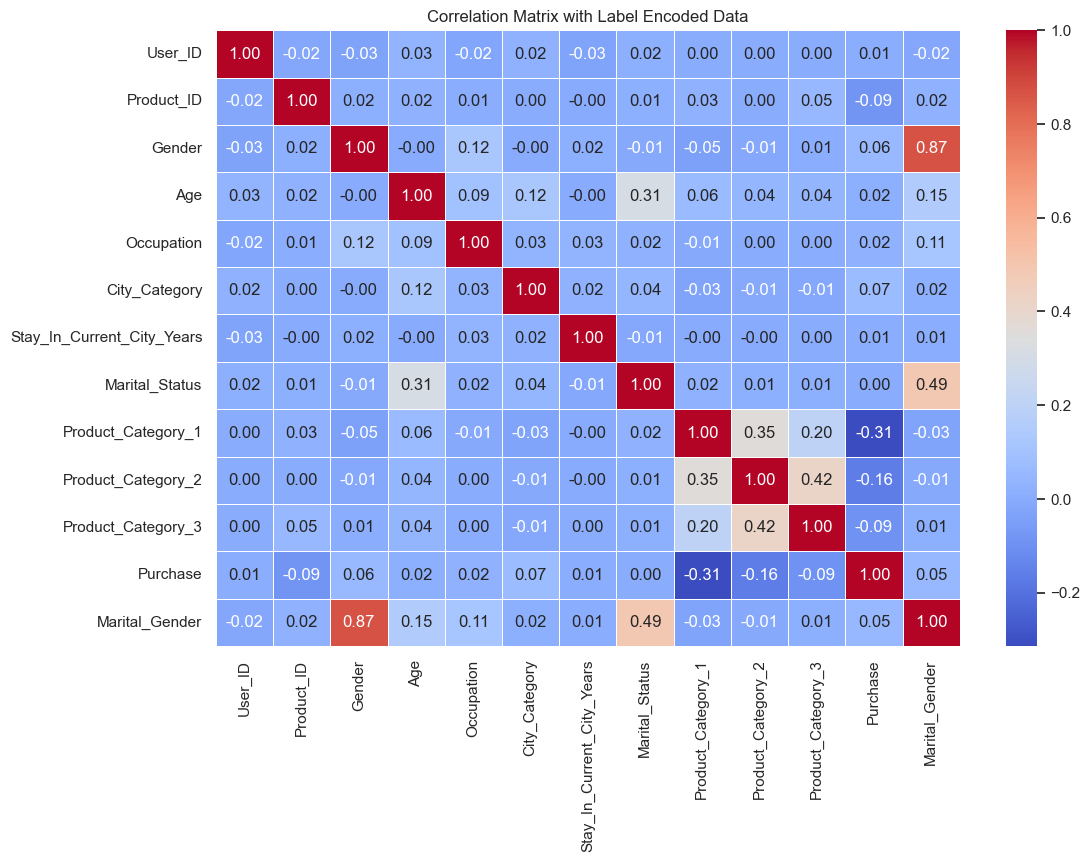

In [166]:
from sklearn.preprocessing import LabelEncoder
#  include categorical as well as numeral  data 
# Create a copy of the DataFrame
df_encoded = df.copy()

# Apply Label Encoding to all object (categorical) columns
le = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Compute and visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr_matrix = df_encoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with Label Encoded Data")
plt.show()


### Insights:

1. **Gender**: More male customers than female.
2. **Age**: Most customers are aged 26-35.
3. **Occupation**: Diverse occupations, some with higher customer counts.
4. **Marital Status**: Balanced between married and unmarried.
5. **City Category**: Most customers are from City Category B.
6. **Stay Duration**: Many customers have stayed in their city for 1-2 years.
7. **Product Categories**: Product Category 1 is the most popular.
8. **Purchase Amount by Age**: Age group 26-35 spends the most.
9. **Purchase Amount by City**: City Category B has the highest spending.
10. **Correlation**: Notable correlations between purchase and product categories.

### Conclusions:

1. **Target Demographics**: Focus on males aged 26-35 and high-customer occupations.
2. **City Focus**: Prioritize City Category B for marketing.
3. **Product Focus**: Promote Product Category 1.
4. **Customer Mobility**: Consider marketing to new movers.
5. **Predictive Modeling**: Use correlations for purchase prediction models.